In [5]:
#importando as bibliotecas
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Carregando os dados de um arquivo CSV
data = pd.read_csv('dadosclientes.csv')

In [8]:
X = data[['Valor_compra', 'qtde_produtos']]
y = data['forma_pag']

In [9]:
X_train, X_teste, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [10]:
modelo = SVC(kernel='linear')
modelo.fit(X_train, y_train)

SVC(kernel='linear')

In [11]:
yprev = modelo.predict(X_teste)

In [13]:
yprev

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [14]:
X_teste

,Valor_compra,qtde_produtos
95,429,7
15,407,10
30,436,10
158,292,9
128,20,9
115,346,19
69,472,10
170,195,7
174,487,16
45,284,15


In [15]:
data.head(200)

,clientes,Valor_compra,qtde_produtos,forma_pag
0,cliente 2,378,10,1
1,cliente 5,475,18,1
2,cliente 1,285,10,1
3,cliente 1,181,4,0
4,cliente 7,177,20,1
...,...,...,...,...
195,cliente 5,391,2,0
196,cliente 7,115,16,0
197,cliente 2,156,12,0
198,cliente 6,46,19,0


In [16]:
acuracy = accuracy_score(yprev,y_test)
print(acuracy)

0.3


In [17]:
classi_re = classification_report(yprev, y_test)
print("Relatório de Classificação:\n", classi_re)

Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.30      0.46        60

    accuracy                           0.30        60
   macro avg       0.50      0.15      0.23        60
weighted avg       1.00      0.30      0.46        60



c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Usuario\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.

In [18]:
cm = confusion_matrix(yprev, y_test)

Text(0.5, 1.0, 'Matriz de Confusão para o algoritmo SVM')

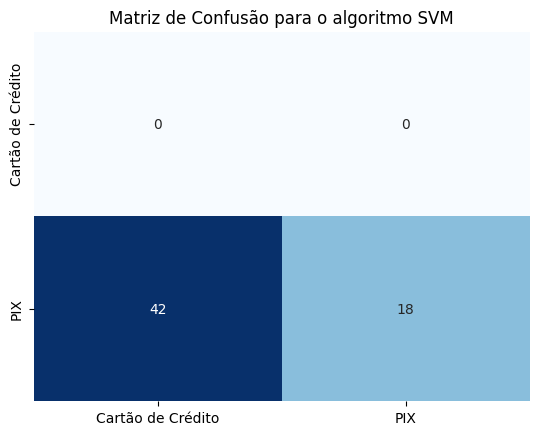

In [19]:
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, 
            xticklabels=['Cartão de Crédito', 'PIX'], 
            yticklabels=['Cartão de Crédito', 'PIX'])

plt.title('Matriz de Confusão para o algoritmo SVM')

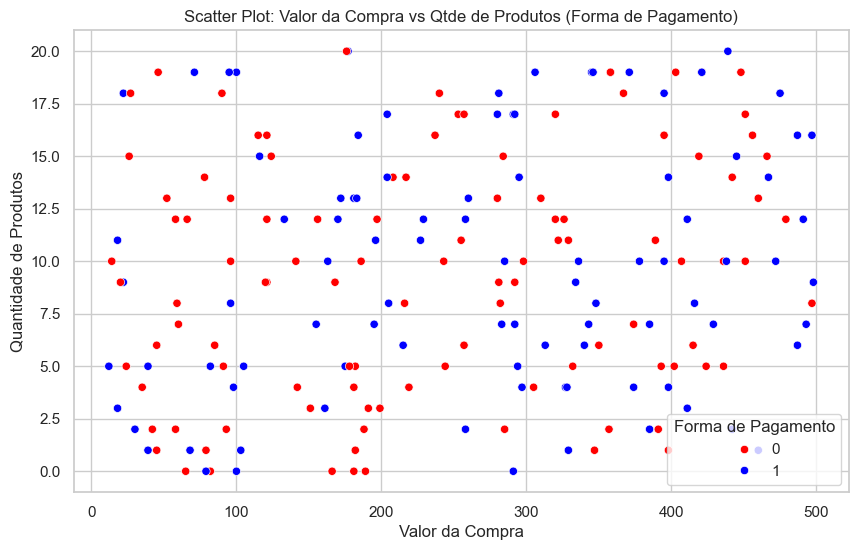

In [20]:
sns.set(style="whitegrid")
# Mapeando as cores com base na classe
palette = {0: "red", 1: "blue"}
# Criando o scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Valor_compra', y='qtde_produtos', hue='forma_pag', data=data, palette=palette)

# Personalizando o gráfico
plt.title('Scatter Plot: Valor da Compra vs Qtde de Produtos (Forma de Pagamento)')
plt.xlabel('Valor da Compra')
plt.ylabel('Quantidade de Produtos')

# Mostrando o gráfico
plt.legend(title='Forma de Pagamento')
plt.show()